In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [3]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv('large_data.csv')



In [4]:
df.head()

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,...,CHILLS,JOINT_PAIN,FATIGUE,HEAD_ACHE,LOSS_OF_APPETITES,PAIN_BEHIND_THE_EYES,BACK_PAIN,MALAISE,RED_SPOTS_OVER_BODY,DISEASE
0,0,1,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,INFLUENZA
1,1,1,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,INFLUENZA
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,INFLUENZA
3,1,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,INFLUENZA
4,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,INFLUENZA


In [5]:
df.drop('DISEASE', axis=1, inplace=True)

In [6]:
df.head()

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,...,SKIN_RASH,CHILLS,JOINT_PAIN,FATIGUE,HEAD_ACHE,LOSS_OF_APPETITES,PAIN_BEHIND_THE_EYES,BACK_PAIN,MALAISE,RED_SPOTS_OVER_BODY
0,0,1,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


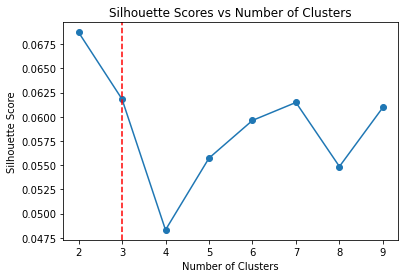

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics


silhouette_scores = []

# Create a list of potential number of clusters to try
num_clusters = range(2, 10)

# Iterate over each number of clusters and calculate the silhouette score
for n_clusters in num_clusters:
    kmeans = KMeans(n_clusters=n_clusters)
    cluster_labels = kmeans.fit_predict(df)
    silhouette_scores.append(metrics.silhouette_score(df, cluster_labels))

# Plot the silhouette scores for each number of clusters
plt.plot(num_clusters, silhouette_scores, '-o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores vs Number of Clusters')

# Use the elbow method to determine the optimal number of clusters
plt.axvline(x=3, color='red', linestyle='--')
plt.show()

In [10]:
kmeans = KMeans(n_clusters=4)

kmeans.fit(df)

# Get the labels and cluster centers
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

feature_means = {}

# Iterate over each cluster
for i in range(len(cluster_centers)):
    # Get the feature means for the current cluster
    means = cluster_centers[i]
    # Create a list of tuples that contains the feature name and its mean value
    feature_list = [(df.columns[j], means[j]) for j in range(len(means))]
    # Sort the features based on their mean values in descending order
#     feature_list = sorted(feature_list, key=lambda x: x[1], reverse=True)
    # Add the feature means to the dictionary
    feature_means[f"Cluster {i+1}"] = feature_list

# Print the feature means for each cluster
for cluster, features in feature_means.items():
    print(f"{cluster}:")
    for feature in features:
        print(f"{feature[0]}: {feature[1]}")
    print()

Cluster 1:
COUGH: 0.5137545534480594
MUSCLE_ACHES: 0.5127496545660096
TIREDNESS: 0.51337771636729
SORE_THROAT: 0.5131264916467784
RUNNY_NOSE: 0.5117447556839592
STUFFY_NOSE: 0.9999999999999959
FEVER: 0.5062178118326843
NAUSEA: 0.4971737218942345
VOMITING: 0.4984298454967968
DIARRHEA: 0.49642004773269693
SHORTNESS_OF_BREATH: 0.49679688481346557
DIFFICULTY_BREATHING: 0.49805300841602795
LOSS_OF_TASTE: 0.47242808692375166
LOSS_OF_SMELL: 4.107825191113079e-15
ITCHY_NOSE: 0.0
ITCHY_EYES: 0.0
ITCHY_MOUTH: 0.0
ITCHY_INNER_EAR: 0.0
SNEEZING: 0.5142570028890842
PINK_EYE: 0.0
SKIN_RASH: -4.0766001685454967e-17
CHILLS: -4.0766001685454967e-17
JOINT_PAIN: -4.0766001685454967e-17
FATIGUE: -4.0766001685454967e-17
HEAD_ACHE: -7.589415207398531e-17
LOSS_OF_APPETITES: -7.589415207398531e-17
PAIN_BEHIND_THE_EYES: -7.589415207398531e-17
BACK_PAIN: -7.589415207398531e-17
MALAISE: -4.0766001685454967e-17
RED_SPOTS_OVER_BODY: -4.0766001685454967e-17

Cluster 2:
COUGH: 0.49665711556828995
MUSCLE_ACHES: 0.510

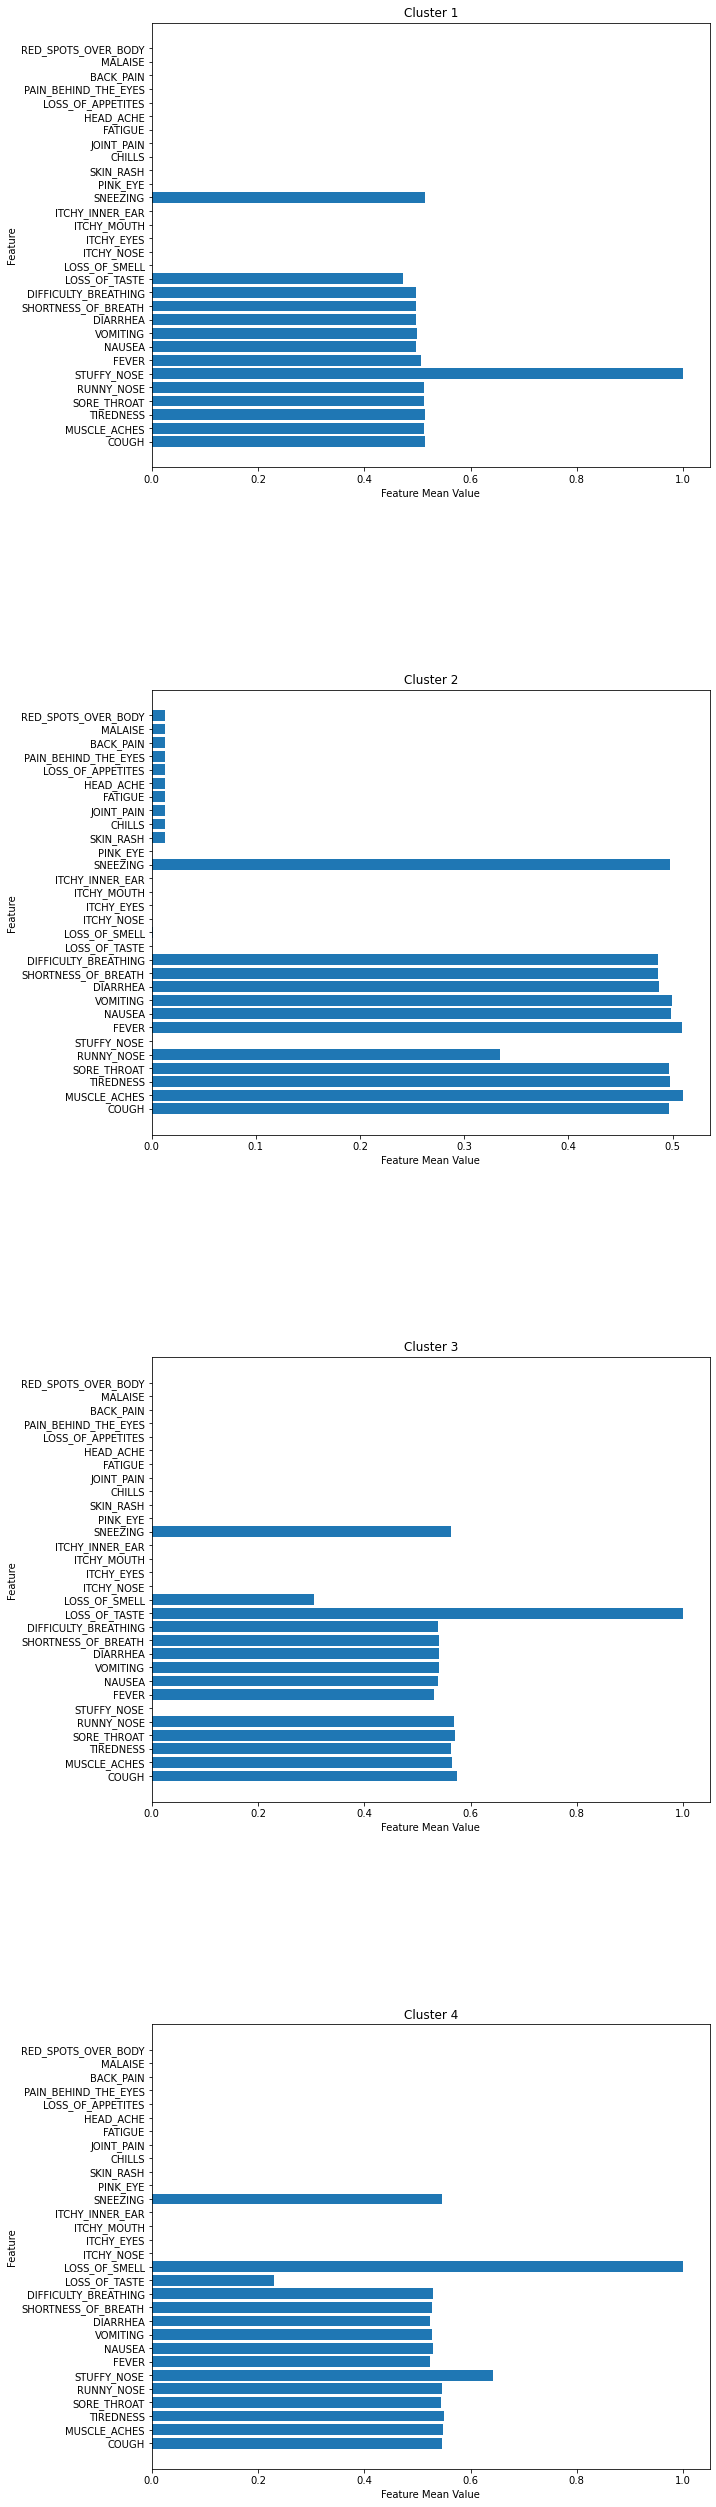

In [11]:
# Create a horizontal bar chart for each cluster
fig, axs = plt.subplots(4, 1, figsize=(10, 45))
for i, (cluster, features) in enumerate(feature_means.items()):
    # Extract the feature names and mean values as separate lists
    feature_names = [feature[0] for feature in features]
    feature_values = [feature[1] for feature in features]
    # Create a horizontal bar chart
    axs[i].barh(feature_names, feature_values)
    axs[i].set_title(cluster)
    axs[i].set_xlabel('Feature Mean Value')
    axs[i].set_ylabel('Feature')

# Adjust the spacing between the subplots
plt.subplots_adjust(hspace=0.5)

# Show the plot
plt.show()





